In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
pd.set_option('max_columns',None)
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('carInsurance_train.csv')
data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [3]:
data.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [5]:
{column: len(data[column].unique())for column in data.columns if data[column].dtypes=='object'}

{'Job': 12,
 'Marital': 3,
 'Education': 4,
 'Communication': 3,
 'LastContactMonth': 12,
 'Outcome': 4,
 'CallStart': 3777,
 'CallEnd': 3764}

In [6]:
{column: (data[column].unique())for column in data.columns if data[column].dtypes=='object'}

{'Job': array(['management', 'blue-collar', 'student', 'technician', 'admin.',
        'services', 'self-employed', 'retired', nan, 'housemaid',
        'entrepreneur', 'unemployed'], dtype=object),
 'Marital': array(['single', 'married', 'divorced'], dtype=object),
 'Education': array(['tertiary', 'primary', 'secondary', nan], dtype=object),
 'Communication': array(['telephone', nan, 'cellular'], dtype=object),
 'LastContactMonth': array(['jan', 'may', 'jun', 'mar', 'nov', 'jul', 'aug', 'sep', 'apr',
        'feb', 'oct', 'dec'], dtype=object),
 'Outcome': array([nan, 'failure', 'other', 'success'], dtype=object),
 'CallStart': array(['13:45:20', '14:49:03', '16:30:24', ..., '12:19:03', '11:27:35',
        '13:31:48'], dtype=object),
 'CallEnd': array(['13:46:30', '14:52:08', '16:36:04', ..., '12:23:53', '11:29:14',
        '13:36:22'], dtype=object)}

In [7]:
for column in data.columns:
    print('{} {} % missing value'.format(column,np.round(data[column].isnull().mean(),4)))

Id 0.0 % missing value
Age 0.0 % missing value
Job 0.0048 % missing value
Marital 0.0 % missing value
Education 0.0422 % missing value
Default 0.0 % missing value
Balance 0.0 % missing value
HHInsurance 0.0 % missing value
CarLoan 0.0 % missing value
Communication 0.2255 % missing value
LastContactDay 0.0 % missing value
LastContactMonth 0.0 % missing value
NoOfContacts 0.0 % missing value
DaysPassed 0.0 % missing value
PrevAttempts 0.0 % missing value
Outcome 0.7605 % missing value
CallStart 0.0 % missing value
CallEnd 0.0 % missing value
CarInsurance 0.0 % missing value


In [8]:
{column:len(data[column].unique()) for column in data.columns if data[column].dtypes=='int64'}

{'Id': 4000,
 'Age': 70,
 'Default': 2,
 'Balance': 2178,
 'HHInsurance': 2,
 'CarLoan': 2,
 'LastContactDay': 31,
 'NoOfContacts': 35,
 'DaysPassed': 330,
 'PrevAttempts': 20,
 'CarInsurance': 2}

In [9]:
data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


Now we can delete the outcome and id column we don't need it

In [10]:
data = data.drop(['Id','Outcome'],axis = 1)

<AxesSubplot:>

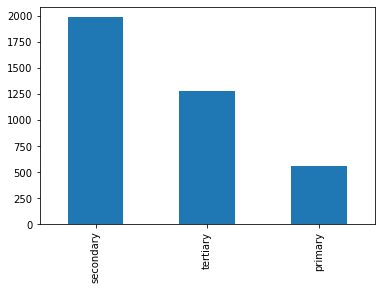

In [11]:
data['Education'].value_counts().plot(kind = 'bar')

In [12]:
data['Job'].mode()

0    management
dtype: object

In [13]:
data['Job'].isnull().sum()

19

Now we can fill the job column with mode 

In [14]:
for column in ['Age','Education','Communication']:
    data[column].fillna(data[column].mode()[0],inplace = True)
    
    

In [15]:
data.isna().sum()

Age                  0
Job                 19
Marital              0
Education            0
Default              0
Balance              0
HHInsurance          0
CarLoan              0
Communication        0
LastContactDay       0
LastContactMonth     0
NoOfContacts         0
DaysPassed           0
PrevAttempts         0
CallStart            0
CallEnd              0
CarInsurance         0
dtype: int64

In [16]:
data['Job'] = data['Job'].fillna(data['Job'].mode()[0])

In [17]:
data.isna().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

Now we can calculate the talktime between the customer and seller 

In [18]:
data['CallDuration'] = (pd.to_datetime(data['CallEnd'])-pd.to_datetime(data['CallStart'])).apply(lambda x: x.seconds)

In [19]:
data = data.drop(['CallStart','CallEnd'],axis = 1)

In [20]:
data

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,CallDuration
0,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,0,70
1,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,0,185
2,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,1,340
3,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,1,819
4,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,0,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,1,269
3996,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,0,125
3997,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,0,290
3998,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,0,99


Binary_Encoding in Communication

<AxesSubplot:>

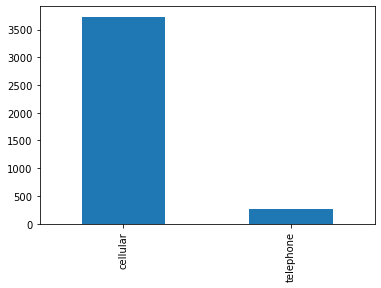

In [21]:
data['Communication'].value_counts().plot(kind = 'bar')

In [22]:
data['Communication'].replace({'telephone':0,'cellular':1},inplace = True)

In [23]:
{column:len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Job': 11, 'Marital': 3, 'Education': 3, 'LastContactMonth': 12}

ordinal_encoding

In [24]:
data['Education'].replace({'primary':0,'secondary':1,'tertiary':2},inplace = True)

In [25]:
data.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,CallDuration
0,32,management,single,2,0,1218,1,0,0,28,jan,2,-1,0,0,70
1,32,blue-collar,married,0,0,1156,1,0,1,26,may,5,-1,0,0,185
2,29,management,single,2,0,637,1,0,1,3,jun,1,119,1,1,340
3,25,student,single,0,0,373,1,0,1,11,may,2,-1,0,1,819
4,30,management,married,2,0,2694,0,0,1,3,jun,1,-1,0,0,192


In [26]:
data['LastContactMonth'] = data['LastContactMonth'].replace({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,
                                                            'oct':9,'nov':10,'dec':11})

In [27]:
data.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,CallDuration
0,32,management,single,2,0,1218,1,0,0,28,0,2,-1,0,0,70
1,32,blue-collar,married,0,0,1156,1,0,1,26,4,5,-1,0,0,185
2,29,management,single,2,0,637,1,0,1,3,5,1,119,1,1,340
3,25,student,single,0,0,373,1,0,1,11,4,2,-1,0,1,819
4,30,management,married,2,0,2694,0,0,1,3,5,1,-1,0,0,192


In [28]:
data

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,CallDuration
0,32,management,single,2,0,1218,1,0,0,28,0,2,-1,0,0,70
1,32,blue-collar,married,0,0,1156,1,0,1,26,4,5,-1,0,0,185
2,29,management,single,2,0,637,1,0,1,3,5,1,119,1,1,340
3,25,student,single,0,0,373,1,0,1,11,4,2,-1,0,1,819
4,30,management,married,2,0,2694,0,0,1,3,5,1,-1,0,0,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,28,technician,single,2,0,0,1,0,1,25,4,1,40,2,1,269
3996,49,admin.,divorced,1,0,124,1,1,1,29,6,19,-1,0,0,125
3997,27,admin.,single,1,0,-400,0,1,1,8,6,1,-1,0,0,290
3998,36,entrepreneur,single,2,0,658,1,0,1,29,0,1,227,3,0,99


In [29]:
data

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,CallDuration
0,32,management,single,2,0,1218,1,0,0,28,0,2,-1,0,0,70
1,32,blue-collar,married,0,0,1156,1,0,1,26,4,5,-1,0,0,185
2,29,management,single,2,0,637,1,0,1,3,5,1,119,1,1,340
3,25,student,single,0,0,373,1,0,1,11,4,2,-1,0,1,819
4,30,management,married,2,0,2694,0,0,1,3,5,1,-1,0,0,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,28,technician,single,2,0,0,1,0,1,25,4,1,40,2,1,269
3996,49,admin.,divorced,1,0,124,1,1,1,29,6,19,-1,0,0,125
3997,27,admin.,single,1,0,-400,0,1,1,8,6,1,-1,0,0,290
3998,36,entrepreneur,single,2,0,658,1,0,1,29,0,1,227,3,0,99


In [30]:
for column in ['Job','Marital']:
    dummies = pd.get_dummies(data[column],prefix = column)
    data = pd.concat([data,dummies],axis = 1)
    data = data.drop(column,axis = 1)

In [31]:
data

,Age,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,CallDuration,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_divorced,Marital_married,Marital_single
0,32,2,0,1218,1,0,0,28,0,2,-1,0,0,70,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,32,0,0,1156,1,0,1,26,4,5,-1,0,0,185,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,29,2,0,637,1,0,1,3,5,1,119,1,1,340,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,25,0,0,373,1,0,1,11,4,2,-1,0,1,819,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,30,2,0,2694,0,0,1,3,5,1,-1,0,0,192,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,28,2,0,0,1,0,1,25,4,1,40,2,1,269,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3996,49,1,0,124,1,1,1,29,6,19,-1,0,0,125,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3997,27,1,0,-400,0,1,1,8,6,1,-1,0,0,290,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3998,36,2,0,658,1,0,1,29,0,1,227,3,0,99,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [32]:
{column: (data[column].unique())for column in data.columns if data[column].dtypes=='object'}

{}

In [33]:
X = data.drop(['CarInsurance'],axis = 1)
y = data['CarInsurance']

In [34]:
X

,Age,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallDuration,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_divorced,Marital_married,Marital_single
0,32,2,0,1218,1,0,0,28,0,2,-1,0,70,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,32,0,0,1156,1,0,1,26,4,5,-1,0,185,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,29,2,0,637,1,0,1,3,5,1,119,1,340,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,25,0,0,373,1,0,1,11,4,2,-1,0,819,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,30,2,0,2694,0,0,1,3,5,1,-1,0,192,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,28,2,0,0,1,0,1,25,4,1,40,2,269,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3996,49,1,0,124,1,1,1,29,6,19,-1,0,125,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3997,27,1,0,-400,0,1,1,8,6,1,-1,0,290,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3998,36,2,0,658,1,0,1,29,0,1,227,3,99,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [35]:
y

0       0
1       0
2       1
3       1
4       0
       ..
3995    1
3996    0
3997    0
3998    0
3999    0
Name: CarInsurance, Length: 4000, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2800, 27), (1200, 27))

In [37]:
X_train.corr()

,Age,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallDuration,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_divorced,Marital_married,Marital_single
Age,1.000000,-0.197878,0.002052,0.100609,-0.182440,-0.012316,-0.199610,0.010998,0.055081,0.028980,0.000090,0.017311,0.033354,-0.055106,-0.032416,0.034502,0.087893,-0.042596,0.515719,0.012533,-0.089455,-0.256743,-0.094276,0.029265,0.183884,0.307103,-0.461481
Education,-0.197878,1.000000,-0.033470,0.044901,-0.096473,-0.041046,0.066264,0.012115,0.049895,0.022079,0.013563,0.016365,-0.038777,-0.025970,-0.386140,0.024275,-0.146334,0.519566,-0.170076,0.108272,-0.085925,-0.001729,0.045621,-0.045463,-0.009403,-0.137262,0.154707
Default,0.002052,-0.033470,1.000000,-0.061442,-0.005292,0.117627,0.022173,0.030743,0.006590,0.014676,-0.026593,-0.027776,0.018755,-0.026492,0.040278,-0.004187,0.028712,0.005674,-0.020892,-0.005849,-0.027780,-0.023026,-0.002131,0.025425,0.006806,0.013441,-0.019318
Balance,0.100609,0.044901,-0.061442,1.000000,-0.066892,-0.076434,-0.029979,0.018790,0.049889,-0.013795,-0.003474,-0.000326,0.033480,-0.027360,-0.041102,0.031466,-0.040769,0.056799,0.078266,0.028187,-0.060898,-0.001784,-0.006842,-0.008866,-0.002443,0.012145,-0.011369
HHInsurance,-0.182440,-0.096473,-0.005292,-0.066892,1.000000,0.080668,0.090833,-0.012458,-0.126645,-0.009524,0.062827,0.017281,0.025171,0.037585,0.227301,-0.005862,-0.043598,-0.068367,-0.193315,-0.011784,0.057862,-0.137040,0.021778,-0.085951,0.011242,0.020896,-0.030501
CarLoan,-0.012316,-0.041046,0.117627,-0.076434,0.080668,1.000000,0.042891,0.019776,0.021003,0.025565,-0.036125,0.000931,0.041410,0.018748,0.026053,0.052136,-0.026219,-0.051475,-0.038178,-0.004058,0.049900,-0.060389,0.045373,-0.049104,-0.007064,0.036192,-0.034032
Communication,-0.199610,0.066264,0.022173,-0.029979,0.090833,0.042891,1.000000,-0.009776,-0.045632,-0.086391,-0.010766,-0.031498,0.028920,-0.005808,0.042941,-0.041159,-0.071761,0.040757,-0.155456,-0.002387,0.002821,-0.008305,0.056965,0.024627,-0.026048,-0.021500,0.041639
LastContactDay,0.010998,0.012115,0.030743,0.018790,-0.012458,0.019776,-0.009776,1.000000,0.050820,0.152493,-0.084760,-0.074453,-0.007217,-0.023627,-0.057251,-0.007960,0.038291,0.001733,0.012958,-0.019556,0.023674,-0.004221,0.042573,0.015260,0.023851,-0.005950,-0.010477
LastContactMonth,0.055081,0.049895,0.006590,0.049889,-0.126645,0.021003,-0.045632,0.050820,1.000000,0.038097,-0.023324,0.030366,-0.009948,-0.024042,-0.080102,0.005733,0.061849,0.076044,0.024479,-0.008806,0.004564,0.021640,-0.022566,-0.030818,-0.019407,0.057654,-0.048437
NoOfContacts,0.028980,0.022079,0.014676,-0.013795,-0.009524,0.025565,-0.086391,0.152493,0.038097,1.000000,-0.090103,-0.050585,-0.059451,-0.052491,0.010389,0.023354,0.030734,0.049083,-0.042697,-0.008967,-0.003392,-0.035144,0.024098,-0.040900,-0.008571,0.045951,-0.043491


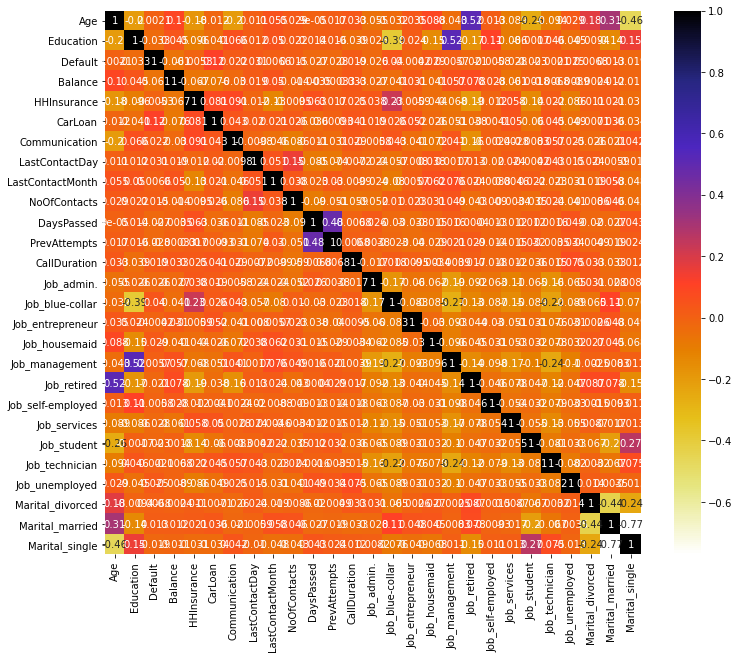

In [38]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [39]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [43]:
corr_features = correlation(X_train, 0.6)
len(set(corr_features))

1

In [44]:
corr_features

{'Marital_single'}

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),index = X_train.index,columns =X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),index = X_test.index,columns = X_test.columns)

In [46]:
X_train

,Age,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallDuration,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_divorced,Marital_married,Marital_single
3336,-0.890732,-0.264891,-0.126353,-0.288994,1.003578,-0.396264,0.26675,1.454315,-0.482925,-0.508329,-0.459917,-0.326649,-0.364599,-0.354121,-0.488252,-0.170392,-0.174781,-0.548189,-0.258985,-0.178010,3.311467,-0.182237,-0.445104,-0.183280,-0.367399,-1.184666,1.537981
2540,-1.063116,-0.264891,-0.126353,-0.183392,1.003578,-0.396264,0.26675,-1.400199,-0.090531,-0.508329,-0.459917,-0.326649,0.040401,2.823891,-0.488252,-0.170392,-0.174781,-0.548189,-0.258985,-0.178010,-0.301981,-0.182237,-0.445104,-0.183280,-0.367399,0.844120,-0.650203
332,1.695025,-0.264891,-0.126353,-0.170269,-0.996435,-0.396264,0.26675,0.264935,0.694258,1.018185,-0.459917,-0.326649,1.998408,-0.354121,-0.488252,-0.170392,-0.174781,1.824189,-0.258985,-0.178010,-0.301981,-0.182237,-0.445104,-0.183280,-0.367399,0.844120,-0.650203
852,0.746914,-0.264891,-0.126353,-0.307427,-0.996435,-0.396264,0.26675,1.454315,0.301863,1.018185,-0.459917,-0.326649,-0.790914,2.823891,-0.488252,-0.170392,-0.174781,-0.548189,-0.258985,-0.178010,-0.301981,-0.182237,-0.445104,-0.183280,-0.367399,0.844120,-0.650203
1036,-0.201197,-0.264891,-0.126353,0.223396,-0.996435,-0.396264,0.26675,0.621749,1.871441,-0.203026,-0.459917,-0.326649,1.240175,-0.354121,-0.488252,-0.170392,-0.174781,-0.548189,-0.258985,-0.178010,-0.301981,-0.182237,-0.445104,5.456119,-0.367399,0.844120,-0.650203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1.264066,-1.797317,-0.126353,-0.545501,1.003578,-0.396264,0.26675,1.216439,-0.482925,-0.508329,-0.459917,-0.326649,-0.017456,-0.354121,2.048122,-0.170392,-0.174781,-0.548189,-0.258985,-0.178010,-0.301981,-0.182237,-0.445104,-0.183280,2.721839,-1.184666,-0.650203
3264,-0.804540,-0.264891,-0.126353,0.338996,-0.996435,-0.396264,0.26675,0.383873,1.871441,-0.508329,-0.459917,-0.326649,1.556867,-0.354121,-0.488252,-0.170392,-0.174781,-0.548189,-0.258985,-0.178010,3.311467,-0.182237,-0.445104,-0.183280,-0.367399,-1.184666,1.537981
1653,-0.459772,-0.264891,-0.126353,-0.089037,1.003578,-0.396264,0.26675,-0.805508,-1.660109,1.323487,1.856145,3.903333,-1.016253,-0.354121,-0.488252,-0.170392,-0.174781,-0.548189,-0.258985,5.617663,-0.301981,-0.182237,-0.445104,-0.183280,-0.367399,0.844120,-0.650203
2607,0.402147,-0.264891,-0.126353,-0.189953,-0.996435,2.523573,0.26675,-0.210818,0.301863,-0.203026,-0.459917,-0.326649,-0.580802,-0.354121,2.048122,-0.170392,-0.174781,-0.548189,-0.258985,-0.178010,-0.301981,-0.182237,-0.445104,-0.183280,-0.367399,0.844120,-0.650203


In [47]:
X_train.var()

Age                  1.000357
Education            1.000357
Default              1.000357
Balance              1.000357
HHInsurance          1.000357
CarLoan              1.000357
Communication        1.000357
LastContactDay       1.000357
LastContactMonth     1.000357
NoOfContacts         1.000357
DaysPassed           1.000357
PrevAttempts         1.000357
CallDuration         1.000357
Job_admin.           1.000357
Job_blue-collar      1.000357
Job_entrepreneur     1.000357
Job_housemaid        1.000357
Job_management       1.000357
Job_retired          1.000357
Job_self-employed    1.000357
Job_services         1.000357
Job_student          1.000357
Job_technician       1.000357
Job_unemployed       1.000357
Marital_divorced     1.000357
Marital_married      1.000357
Marital_single       1.000357
dtype: float64

In [49]:
y_train

3336    0
2540    0
332     1
852     0
1036    1
       ..
835     0
3264    1
1653    0
2607    0
2732    0
Name: CarInsurance, Length: 2800, dtype: int64

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [51]:
models = {"Logistic Regression" : LogisticRegression(),
         'Decision Tree':DecisionTreeClassifier(),
         'Support vector Machine':LinearSVC(),
         'Support vector machine(RBF KERNAL)':SVC(),
         'Random_Forest':RandomForestClassifier(),
         'Gradient Boosting':GradientBoostingClassifier()}

In [53]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print(name+' trained')

Logistic Regression trained
Decision Tree trained
Support vector Machine trained
Support vector machine(RBF KERNAL) trained
Random_Forest trained
Gradient Boosting trained


In [54]:
for name,model in models.items():
    print(name+':{:.2f}%'.format(model.score(X_test,y_test)*100))

Logistic Regression:78.33%
Decision Tree:76.17%
Support vector Machine:78.25%
Support vector machine(RBF KERNAL):79.75%
Random_Forest:84.17%
Gradient Boosting:82.00%


In [56]:
yp = model.predict(X_test)
yp

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score               #Score ofGradient Boosting
a = round(accuracy_score(y_test,yp) * 100,2)
a

82.0

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,yp)
cm

array([[599, 112],
       [104, 385]], dtype=int64)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       711
           1       0.77      0.79      0.78       489

    accuracy                           0.82      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.82      0.82      0.82      1200

